In [106]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20 , 10)

In [3]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [8]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df2 = df1.drop(['area_type' ,'society' , 'availability'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [13]:
df2.isnull() #checks for empty values
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [14]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [15]:
df3.head()


,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [17]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

C:\Users\arhan\AppData\Local\Temp\ipykernel_3272\3847263516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [18]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [19]:
df3['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [21]:
df3[df3.bhk > 20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [22]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [26]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2
661,Yelahanka,2 BHK,1120 - 1145,2.0,0.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0.0,445.000,4
772,Banashankari Stage VI,2 BHK,1160 - 1195,2.0,0.0,59.935,2


In [59]:
def convert(x):
    tokens =x.split('-')
    if(len(tokens) == 2):
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [58]:
df4 =df3.copy()
df3.head()
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [63]:
df4['total_sqft'] = df4['total_sqft'].apply(convert)

In [67]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [68]:
df5 = df4.copy()

In [71]:
df5['price_per_sq_ft'] = (df5['price']*100000/df5['total_sqft']).round(2)
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.00


In [74]:
len(df5.location.unique())

1265

In [75]:
df5.location = df5.location.apply(lambda x: x.strip())

In [79]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending= False)

In [80]:
location_stats

location
Whitefield              515
Sarjapur  Road          372
Electronic City         302
Kanakpura Road          261
Thanisandra             234
                       ... 
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1254, dtype: int64

In [81]:
location_stats_less_10 = location_stats[location_stats < 10]

In [82]:
location_stats_less_10

location
Chandra Layout          9
Nehru Nagar             9
Kamakshipalya           9
B Narayanapura          9
Nagadevanahalli         9
                       ..
Kanakapura  Rod         1
Kanakapura Main Road    1
Kanakapura Road         1
Kanakapura Road,        1
whitefiled              1
Name: location, Length: 1007, dtype: int64

In [83]:
len(location_stats_less_10)

1007

In [84]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_10 else x)

In [85]:
df5.location.tail()

13314        Green Glen Layout
13315               Whitefield
13317    Raja Rajeshwari Nagar
13318          Padmanabhanagar
13319             Doddathoguru
Name: location, dtype: object

In [86]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending= False)

In [87]:
location_stats

location
other                    2639
Whitefield                515
Sarjapur  Road            372
Electronic City           302
Kanakpura Road            261
                         ... 
Naganathapura              10
1st Block Koramangala      10
Kalkere                    10
Dairy Circle               10
Basapura                   10
Name: location, Length: 248, dtype: int64

In [88]:
len(df5.location.unique())

248

In [90]:
df5.tail(100)

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
13210,Sarjapur Road,3 BHK,1850.0,3.0,2.0,89.0,3,4810.81
13211,other,2 BHK,745.0,2.0,1.0,36.0,2,4832.21
13212,Whitefield,1 BHK,613.0,1.0,1.0,48.0,1,7830.34
13214,Bannerghatta Road,3 BHK,1470.0,2.0,1.0,85.0,3,5782.31
13215,Frazer Town,1 Bedroom,896.0,1.0,0.0,100.0,1,11160.71
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.0,3,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.0,5,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.0,2,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.0,4,10407.34


In [91]:
df5[df5.total_sqft / df5.bhk < 300].head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.00
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.61
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.21


In [92]:
df5.shape


(12710, 8)

In [97]:
df6 = df5[~(df5.total_sqft / df5.bhk < 30)]
df6.shape

(12705, 8)

In [95]:
df6.price_per_sq_ft.describe()

count     12663.000000
mean       6550.392521
std        4348.777937
min         267.830000
25%        4242.420000
50%        5375.490000
75%        7142.860000
max      176470.590000
Name: price_per_sq_ft, dtype: float64

In [98]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sq_ft)
        st = np.std(subdf.price_per_sq_ft)
        reduced_df = subdf[((subdf.price_per_sq_ft) > (m-st)) & ((subdf.price_per_sq_ft) < (m + st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [99]:
df7 = remove_pps_outliers(df6)
df7.shape

(10423, 8)

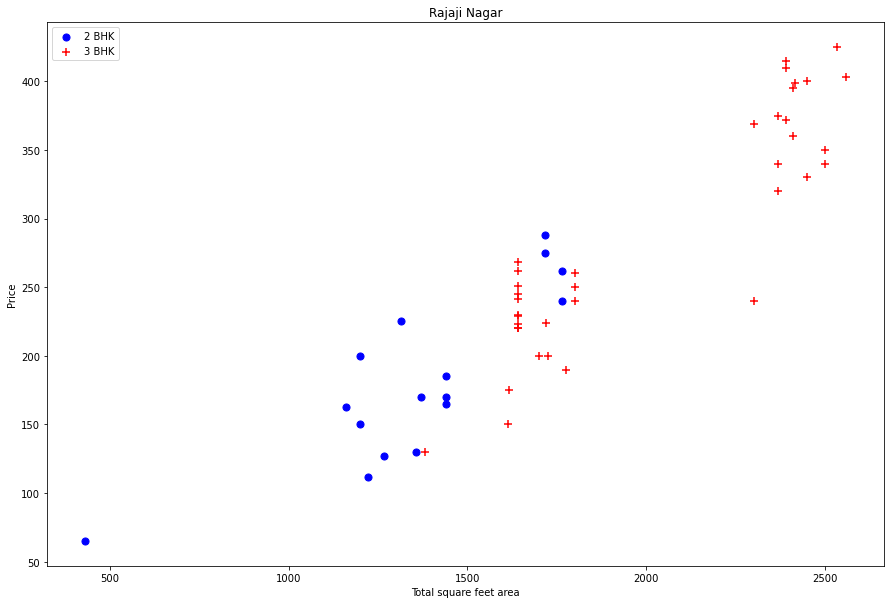

In [108]:
#spotting more Outliers
def plot_scatter_chart(df , location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    
    matplotlib.rcParams['figure.figsize'] = (15,10) #??
    
    plt.scatter(bhk2.total_sqft , bhk2.price, color = 'blue' , label = '2 BHK' , s = 50)
    plt.scatter(bhk3.total_sqft , bhk3.price,marker = '+', color = 'red' , label = '3 BHK' , s = 50)
    
    plt.xlabel("Total square feet area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7 , "Rajaji Nagar")
    
    

In [113]:
 def remove_bhk_outliers(df):
        exclude_indices = np.array([])
        for location, location_df in df.groupby('location'):
            bhk_stats = {}
            for bhk, bhk_df in location_df.groupby('bhk'):
                bhk_stats[bhk] = {
                    'mean': np.mean(bhk_df.price_per_sq_ft),
                    'std' : np.std(bhk_df.price_per_sq_ft),
                    'count' : bhk_df.shape[0]
                }
            for bhk, bhk_df in location_df.groupby('bhk'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count'] > 5:
                    exclude_indices = np.append(exclude_indices , bhk_df[bhk_df.price_per_sq_ft < (stats['mean'])].index.values)
        return df.drop(exclude_indices, axis ="index")

                

In [115]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7490, 8)

Text(0, 0.5, 'count')

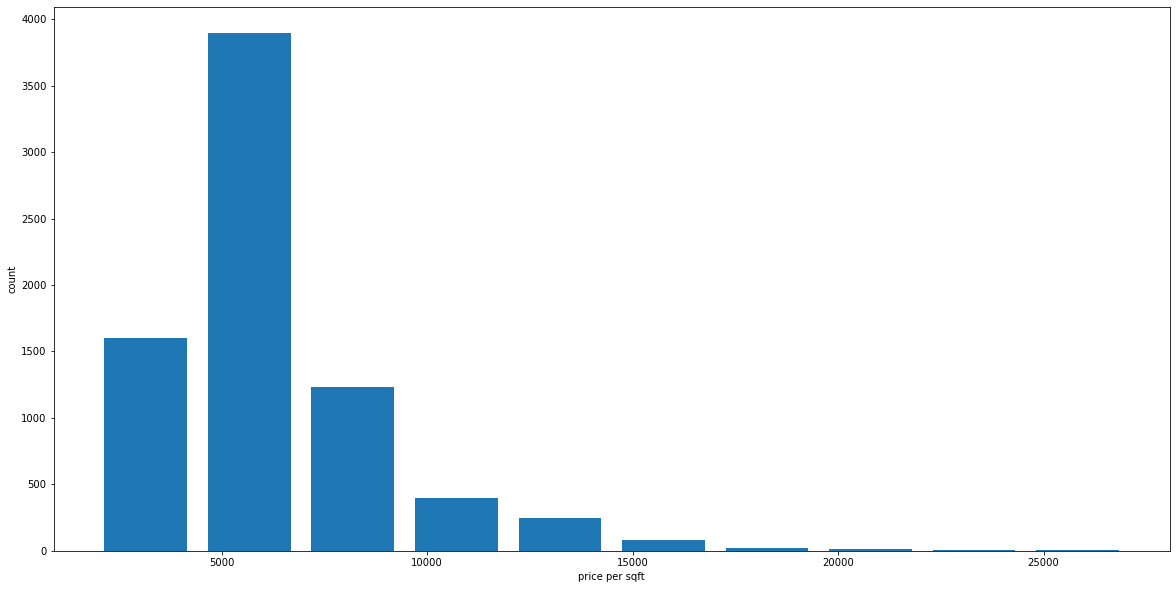

In [116]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sq_ft, rwidth = 0.8)
plt.xlabel("price per sqft")
plt.ylabel("count")

In [117]:
#to remove outliers for bathrooms where bathrooms are more than bedrooms+2

In [118]:
df8[df8.bath > df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sq_ft
1534,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,230.0,6,15333.33
1668,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.03
6864,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.03
8471,other,8 Bedroom,990.0,12.0,0.0,120.0,8,12121.21
8582,other,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.90
9825,other,6 Bedroom,1200.0,9.0,3.0,122.0,6,10166.67


In [119]:
df9 = df8[df8.bath < (df8.bhk+2)]
df9.shape

(7414, 8)

In [120]:
df10 = df9.drop(['size' , 'price_per_sq_ft'], axis = "columns")
df10.shape
df10.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6


# making dumies for location data as regression model can't work on strings

In [122]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df11 = pd.concat([df10, dummies.drop('other' , axis = 'columns')] , axis = "columns")
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1200.0,6.0,2.0,125.0,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,930.0,4.0,2.0,85.0,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
df12 = df11.drop("location" , axis= "columns")


# Time to train the data hehe


In [126]:
X = df12.drop('price' , axis= "columns")
X.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,2.0,6,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,2.0,7,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
Y= df12.price
Y.head()

0    428.0
1    194.0
2    125.0
3    235.0
4     85.0
Name: price, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.2 , random_state = 10)

In [129]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test , y_test)

0.8600738093149709

## using K-fold cross validation to test linear regression iteratively

In [130]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5 , test_size =0.2 , random_state = 0)
cross_val_score(LinearRegression(), X , Y , cv = cv)

array([0.81397345, 0.84616447, 0.79448217, 0.83007588, 0.84075799])

### Trying LASSO and Decision Tree regressor iteratively to train models and measure performance

In [140]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchCV(X , Y):
    algos = {
        'linear_regression' : {
            'model' : LinearRegression(),
            'params': {
                'normalize' : [True, False]  #grid CV also does hyper parameter tuning
            }
        },
        'lasso': {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random' , 'cyclic']
            }
        },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse' ,'friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
        
    }
    
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.2 , random_state = 0)
    for algo_name , config in algos.items():
        gs = GridSearchCV(config['model'] , config['params'] , cv= cv , return_train_score= False)
        gs.fit(X, Y)
        scores.append({
            'model': algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
        return pd.DataFrame(scores , columns = {'model', 'best_score' , 'best_params'})
    


In [141]:
find_best_model_using_gridsearchCV(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_params,best_score
0,linear_regression,{'normalize': False},0.825091


In [147]:
np.where(X.columns == '2nd Stage Nagarbhavi')[0][0]

8

In [150]:
def predict_price(location , sqft , bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] =1
    return lr_clf.predict([x])[0]

In [154]:
predict_price('Indira Nagar', 1000 ,3 ,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


159.49972189323393

In [152]:
predict_price('1st Block Koramangala', 1000 ,2 ,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


132.6375398339503

In [153]:
predict_price('1st Phase JP Nagar', 1000 ,2 ,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


72.32984970497846

In [155]:
import pickle

In [157]:
with open('banglore_real_estate_predictor.pickle' , 'wb') as f:
    pickle.dump(lr_clf, f)

In [158]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [ ]:
predict_price('1st Phase JP Nagar', 1000 ,2 ,2)